# TASCA M8 T01
Exercicis d'algoritmes d'Agrupació.
Objectius: 
* Neteja i interpretació de les dades.
* Preprocessats i PCA.
* Trobar nombre de clústers òptim
* Creació de models. unsupervised (k-means i clustering jeràrquic).
* Interpretar els resultats.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix,accuracy_score, f1_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from scipy.stats import shapiro
from sklearn.preprocessing import RobustScaler, MinMaxScaler, StandardScaler

In [4]:
df=pd.read_csv("Publicacions Facebook Thailandia.csv")

df

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7045,1050855161656896_1061863470556065,photo,9/24/2016 2:58,89,0,0,89,0,0,0,0,0,NaN,NaN,NaN,NaN
7046,1050855161656896_1061334757275603,photo,9/23/2016 11:19,16,0,0,14,1,0,1,0,0,NaN,NaN,NaN,NaN
7047,1050855161656896_1060126464063099,photo,9/21/2016 23:03,2,0,0,1,1,0,0,0,0,NaN,NaN,NaN,NaN
7048,1050855161656896_1058663487542730,photo,9/20/2016 0:43,351,12,22,349,2,0,0,0,0,NaN,NaN,NaN,NaN


El dataframe contiene información sobre publicaciones en facebook y las interacciones de los usuarios sobre ellas. Las columnas del dataframe son las siguientes:

- status_id: identificador de cada publicación
- status_type: tipo de publicación. Existen 4 tipos: video, photo, link y status
- status_published: fecha i hora de la publicación
- num_reactions: número de reacciones
- num_comments: número de comentarios
- num_shares: número de veces que se ha compartido la publicación
- num_likes: número de me gusta
- num_loves: número de emojis de corazón
- num_wows: número de emojis wow
- num_hahas: número de emojis risa
- num_sads:número de emojis triste
- num_angrys: número de emojis enfadado
- Column1: con todos los valores nulos o sin información
- Column2: con todos los valores nulos  o sin información
- Column3: con todos los valores nulos o sin información
- Column4: con todos los valores nulos o sin información

In [4]:
#Se identifican los 4 tipos de valores que se encuentran en la variable status_type.
df['status_type'].unique()

array(['video', 'photo', 'link', 'status'], dtype=object)

In [5]:
df.shape

(7050, 16)

Se determina la forma del dataframe, concretamente hay 16 columnas y 7050 filas. 

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   status_id         7050 non-null   object 
 1   status_type       7050 non-null   object 
 2   status_published  7050 non-null   object 
 3   num_reactions     7050 non-null   int64  
 4   num_comments      7050 non-null   int64  
 5   num_shares        7050 non-null   int64  
 6   num_likes         7050 non-null   int64  
 7   num_loves         7050 non-null   int64  
 8   num_wows          7050 non-null   int64  
 9   num_hahas         7050 non-null   int64  
 10  num_sads          7050 non-null   int64  
 11  num_angrys        7050 non-null   int64  
 12  Column1           0 non-null      float64
 13  Column2           0 non-null      float64
 14  Column3           0 non-null      float64
 15  Column4           0 non-null      float64
dtypes: float64(4), int64(9), object(3)
memory 

Se comprueban los tipos de variables que hay en el dataframe, a simple vista se destacan 3 tipos diferentes de variables. Las tres primeras, se tratan de variables object. Luego hay variables tipo integer con números enteros. Y finalmente, es relevante destacar que en las últimas 4 columnas hay 0 valores no nulos, por lo que no tendran demasiada relevancia para nuestro dataframe, ya que no aportan ningún tipo de dato relevante. 

In [7]:
df.isnull().sum()

status_id              0
status_type            0
status_published       0
num_reactions          0
num_comments           0
num_shares             0
num_likes              0
num_loves              0
num_wows               0
num_hahas              0
num_sads               0
num_angrys             0
Column1             7050
Column2             7050
Column3             7050
Column4             7050
dtype: int64

Se concluye que las 4 últimas columnas tienen todos los datos nulos, por lo tanto no aportan datos nuevos ni tampoco nada al modelo ni que se va a crear. Mientras que el resto de variables no tienen ningún dato nulo.

In [5]:
df.duplicated().sum()

51

Se detectan 51 duplicados en el dataframe por lo que se deberá tratar qué tipo de datos tenemos duplicados y qué hacer con ellos. 

In [6]:
#Eliminar duplicados
df.drop_duplicates(inplace=True)
#Contar duplicados
df.duplicated().sum()

0

In [7]:
#Eliminar columnas irrelevantes
df.drop(['status_id','status_published','Column1','Column2','Column3','Column4'], axis=1, inplace=True)
df.columns

Index(['status_type', 'num_reactions', 'num_comments', 'num_shares',
       'num_likes', 'num_loves', 'num_wows', 'num_hahas', 'num_sads',
       'num_angrys'],
      dtype='object')

Se elimina la columna de 'status_id' y 'status_published' ya que el identificador de las filas es simplemente un identificador único y no contiene información que pueda ser útil para predecir la variable objetivo. Y el conocimiento de la hora y la fecha no es relevante para el modelo.
Además, se eliminan las 4 últimas columnas del dataframe porque contienen valores nulos.

<AxesSubplot:>

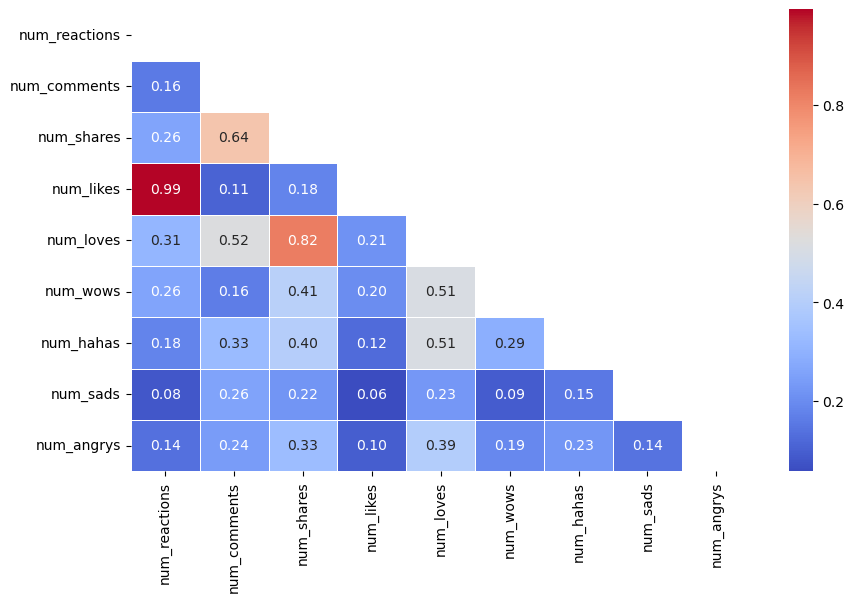

In [8]:
plt.figure(figsize=(10,6))

mask = np.triu(np.ones_like(df.corr(), dtype=bool))
sns.heatmap(df.corr(), annot=True, fmt=".2f", linewidth=.5, cmap='coolwarm', mask=mask)

En la matriz de correlación se decta que existe una correlación positiva entre:

    - Con un 0.99, se detecta una correlación positiva fuerte entre el número de likes y las reacciones, por lo que cuantos más likes más reacciones habrá en una publicación. 
    - Con un 0.82, se observa una correlación positiva entre el número de loves y el número de shares, cuantas más reacciones de love ponen los usuarios más se comparte la publicación.
  
No hay correlaciones negativas relevantes.

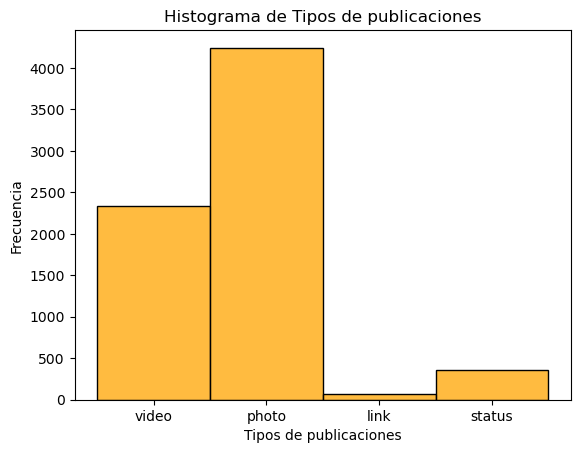

In [16]:
# Crea un histograma con seaborn
sns.histplot(df['status_type'], bins='auto', kde=False, color='orange')

plt.xlabel('Tipos de publicaciones')
plt.ylabel('Frecuencia')
plt.title('Histograma de Tipos de publicaciones')
plt.show()


En el dataframe, se detecta una clara descompensación entre los diferentes tipos de publicaciones. Los tipos de publicaciones son mayoritariamente de fotos y videos. Casi no hay muestras de link o status. Cosa que podrá dificultar el modelo.

In [17]:
#Se guarda el dataframe original
df.head()

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,video,529,512,262,432,92,3,1,1,0
1,photo,150,0,0,150,0,0,0,0,0
2,video,227,236,57,204,21,1,1,0,0
3,photo,111,0,0,111,0,0,0,0,0
4,photo,213,0,0,204,9,0,0,0,0


In [9]:
# Crear columna dummy de columna 'status_type'
column_dummies = pd.get_dummies(df['status_type'], prefix='status_type')

# Concatenar las columnas dummy al nuevo DataFrame
df1 = pd.concat([df, column_dummies], axis=1)

#Se elimina la columna original y una dummie
df1.drop(['status_type'], axis=1, inplace=True)

df1.head()

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,status_type_link,status_type_photo,status_type_status,status_type_video
0,529,512,262,432,92,3,1,1,0,0,0,0,1
1,150,0,0,150,0,0,0,0,0,0,1,0,0
2,227,236,57,204,21,1,1,0,0,0,0,0,1
3,111,0,0,111,0,0,0,0,0,0,1,0,0
4,213,0,0,204,9,0,0,0,0,0,1,0,0


Se crean columnas dummies de la variable categorica status_type en un nuevo dataframe para conservar el original

In [20]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
num_reactions,6999.0,224.994571,452.880746,0.0,17.0,58.0,216.0,4710.0
num_comments,6999.0,225.552079,892.743010,0.0,0.0,4.0,22.0,20990.0
num_shares,6999.0,40.258608,132.046903,0.0,0.0,0.0,4.0,3424.0
num_likes,6999.0,209.946707,439.550330,0.0,17.0,57.0,182.0,4710.0
num_loves,6999.0,12.751536,40.106872,0.0,0.0,0.0,3.0,657.0
num_wows,6999.0,1.252893,8.725551,0.0,0.0,0.0,0.0,278.0
num_hahas,6999.0,0.697957,3.970912,0.0,0.0,0.0,0.0,157.0
num_sads,6999.0,0.232605,1.481105,0.0,0.0,0.0,0.0,51.0
num_angrys,6999.0,0.110159,0.688582,0.0,0.0,0.0,0.0,31.0
status_type_link,6999.0,0.009001,0.094454,0.0,0.0,0.0,0.0,1.0


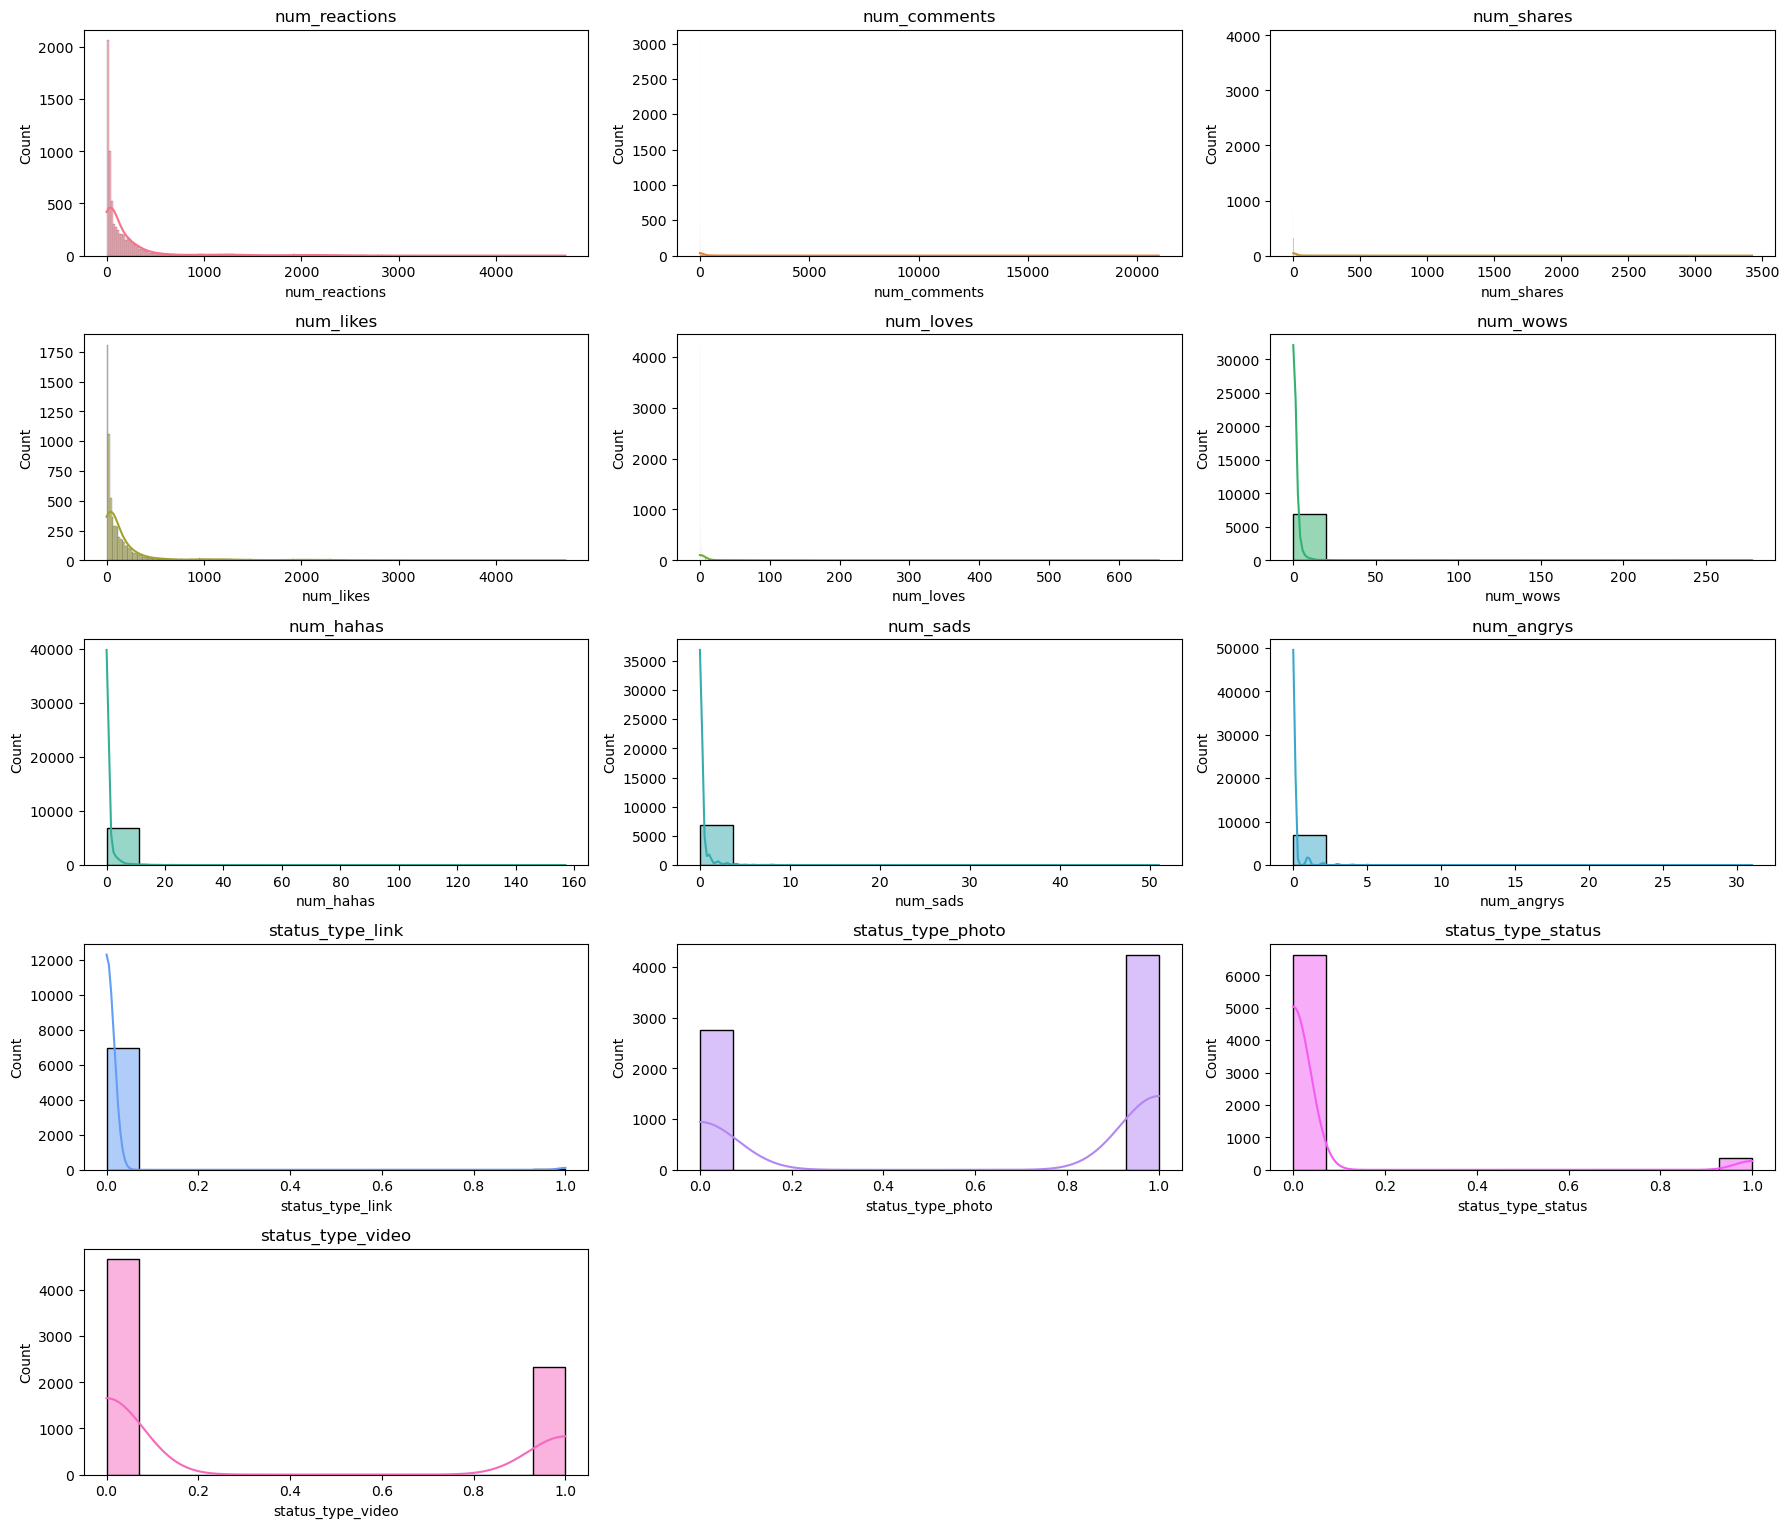

In [10]:
plt.figure(figsize=(18, 18))
palette = sns.color_palette("husl", n_colors=len(df1.columns))

for i, column in enumerate(df1.columns):
    plt.subplot(6, 3, i + 1)
    sns.histplot(data=df, x=df1[column], kde=True, color=palette[i])
    plt.title(f'{column}')
    plt.tight_layout()

plt.show()

La visualización de la muestra de datos con histplot nos permite observar la distribución de los datos, vemos como las variables numéricas, a simple vista no siguen una distribución normal. Las variables categóricas tienen únicamente 0 y 1, fueron las que convertimos en variables dummies.

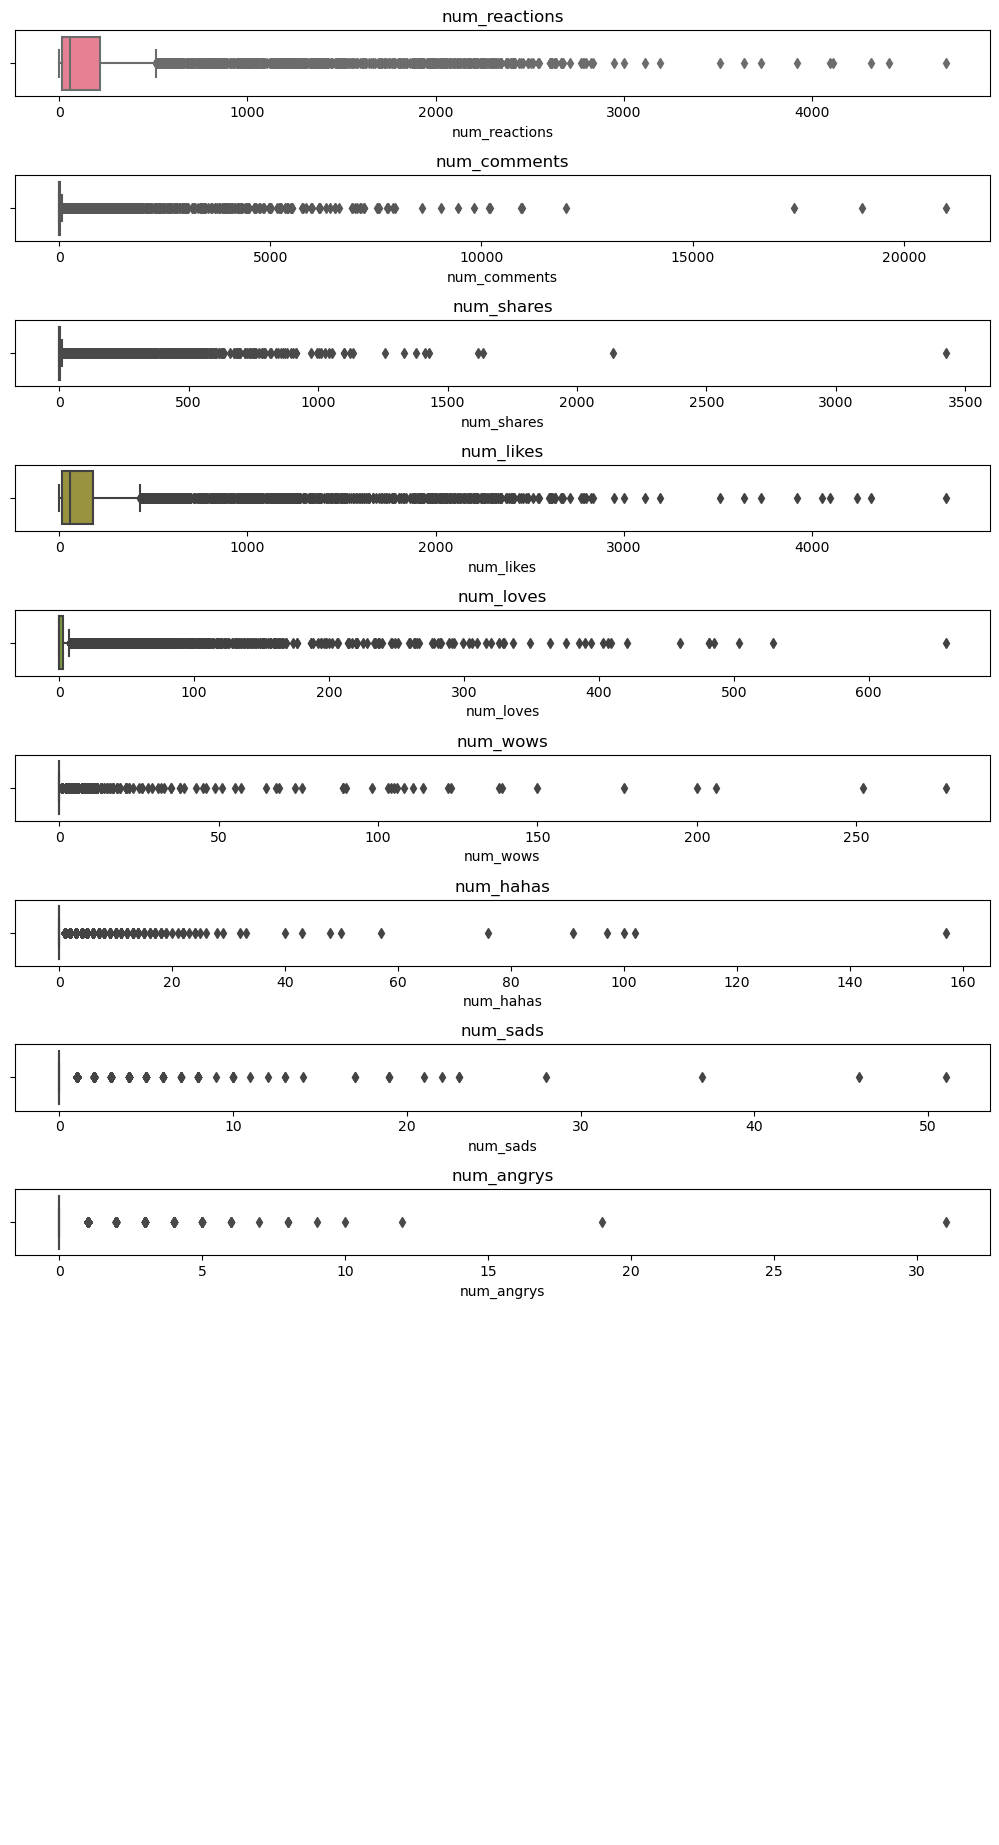

In [24]:
plt.figure(figsize=(20, 20))
palette = sns.color_palette("husl", n_colors=14)

for i, column in enumerate(df1.columns):
    plt.subplot(14, 2, 2*i + 1)
    
    # Verificar si la columna es numérica
    if df1[column].dtype in ['int64', 'float64']:
        sns.boxplot(x=df1[column], orient="h", color=palette[i])
        plt.title(f'{column}')
    else:
        plt.axis('off')
    plt.tight_layout()

plt.show()

Se pone el foco en las varibales numéricas. La visualización de las variables numéricas con boxplot para ver la distribución de las variables. Vemos que las variables tienen outliers. 

In [11]:
from scipy import stats

dfnum = df1.select_dtypes(exclude=['uint8'])


for data in dfnum.columns:
    shapiro_test = stats.shapiro(dfnum[data])
    print("La variable", data, "tiene un p-valor de", "{:.3f}".format(shapiro_test.pvalue))
    if shapiro_test.pvalue > 0.05:
        print("La variable", data, "probablemente tiene una distribución normal o gaussiana.\n")
    else:
        print("La variable", data, "probablemente NO tiene una distribución normal o gaussiana.\n")

La variable num_reactions tiene un p-valor de 0.000
La variable num_reactions probablemente NO tiene una distribución normal o gaussiana.

La variable num_comments tiene un p-valor de 0.000
La variable num_comments probablemente NO tiene una distribución normal o gaussiana.

La variable num_shares tiene un p-valor de 0.000
La variable num_shares probablemente NO tiene una distribución normal o gaussiana.

La variable num_likes tiene un p-valor de 0.000
La variable num_likes probablemente NO tiene una distribución normal o gaussiana.

La variable num_loves tiene un p-valor de 0.000
La variable num_loves probablemente NO tiene una distribución normal o gaussiana.

La variable num_wows tiene un p-valor de 0.000
La variable num_wows probablemente NO tiene una distribución normal o gaussiana.

La variable num_hahas tiene un p-valor de 0.000
La variable num_hahas probablemente NO tiene una distribución normal o gaussiana.

La variable num_sads tiene un p-valor de 0.000
La variable num_sads p

/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Una vez las variables categóricas se han trabajado, se pasa a estandarizar las variables numéricas. Primero se comprueba a través del test shapiro si las variables siguen o no una distribución normal o gaussiana. En este caso se comprueba que ninguna de las variables sigue una distribución normal. Todas las variables tienen claramente valores atípicos o outliers, por lo que se aplicarà la técnica de estandarización RobustScaler.

In [12]:
#copia df variables numéricas
dfnum1 = dfnum.copy()
dfnum1

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,529,512,262,432,92,3,1,1,0
1,150,0,0,150,0,0,0,0,0
2,227,236,57,204,21,1,1,0,0
3,111,0,0,111,0,0,0,0,0
4,213,0,0,204,9,0,0,0,0
...,...,...,...,...,...,...,...,...,...
7045,89,0,0,89,0,0,0,0,0
7046,16,0,0,14,1,0,1,0,0
7047,2,0,0,1,1,0,0,0,0
7048,351,12,22,349,2,0,0,0,0


In [13]:
from sklearn.preprocessing import RobustScaler

#Escalar las variables numéricas con RobustScaler
scaler = RobustScaler()
df1_num_scaled = pd.DataFrame(scaler.fit_transform(dfnum1), columns=dfnum1.columns)

#Muestra del nuevo DataFrame con los datos estandarizados
df1_num_scaled

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,2.366834,23.090909,65.50,2.272727,30.666667,3.0,1.0,1.0,0.0
1,0.462312,-0.181818,0.00,0.563636,0.000000,0.0,0.0,0.0,0.0
2,0.849246,10.545455,14.25,0.890909,7.000000,1.0,1.0,0.0,0.0
3,0.266332,-0.181818,0.00,0.327273,0.000000,0.0,0.0,0.0,0.0
4,0.778894,-0.181818,0.00,0.890909,3.000000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
6994,0.155779,-0.181818,0.00,0.193939,0.000000,0.0,0.0,0.0,0.0
6995,-0.211055,-0.181818,0.00,-0.260606,0.333333,0.0,1.0,0.0,0.0
6996,-0.281407,-0.181818,0.00,-0.339394,0.333333,0.0,0.0,0.0,0.0
6997,1.472362,0.363636,5.50,1.769697,0.666667,0.0,0.0,0.0,0.0


# PCA
La pca sirve para reducir el dataframe, reteniendo la suficiente información de datos. Para ello se calcula la varianza explicada acumulativa.

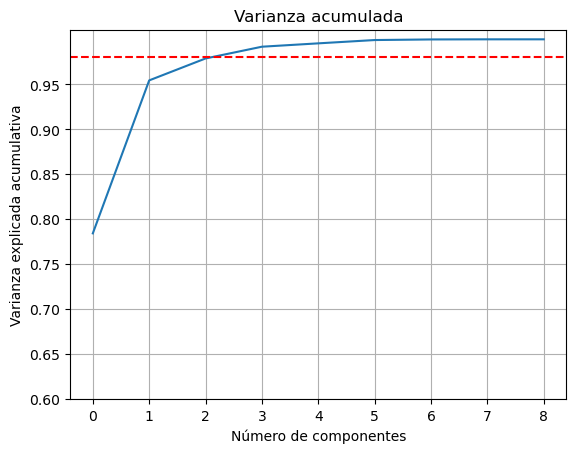

In [15]:
from sklearn.decomposition import PCA

# Crear un objeto PCA y ajustarlo a los datos escalados
pca = PCA().fit(df1_num_scaled)

# Calcular la varianza explicada acumulativa
explained_variance_ratio_cumsum = np.cumsum(pca.explained_variance_ratio_)

# Crear un gráfico de línea para visualizar la varianza explicada acumulativa
plt.plot(explained_variance_ratio_cumsum)
plt.axhline(0.98, color="red", linestyle="--")
plt.yticks(np.arange(0.6, 1.0, 0.05))
plt.xlabel('Número de componentes')
plt.ylabel('Varianza explicada acumulativa')
plt.title("Varianza acumulada")
plt.grid(True)
plt.show()

El gráfico visualiza la varianza explicada acumulativa en función del número de componentes principales. Observamos el número de componentes que debemos utilizar en función de la varianza. En este caso se selecciona un umbral del 98% de varianza explicada. Esto implica retener suficiente información para explicar el 98% de la variabilidad en los datos. Por lo que utilizaremos 2 componentes para alcanzar el 98%.

In [16]:
# Crear un objeto PCA con el número de componentes 
pca = PCA(n_components=2)

# Aplicar PCA al DataFrame escalado
df1_pca = pca.fit_transform(df1_num_scaled)

# Crear un nuevo DataFrame con los resultados de PCA
columnas_pca = [f'PCA_{i+1}' for i in range(2)]
df_pca_resultado = pd.DataFrame(data=df1_pca, columns=columnas_pca)

# Imprimir el DataFrame resultante
print(df_pca_resultado.head())

       PCA_1      PCA_2
0  48.141927  39.279885
1 -14.873807  -2.241151
2   3.371249   3.438150
3 -14.877890  -2.247779
4 -14.268106  -1.394616


El resultado del nuevo dataframe con 2 componentes obtenidos de la PCA.

In [17]:
df_dum = df1.select_dtypes(include=['uint8'])

df_pca_resultado.reset_index(drop=True, inplace=True)
df_dum.reset_index(drop=True, inplace=True)
df_reduced=pd.concat([df_pca_resultado, df_dum], axis=1)

df_reduced.head()

,PCA_1,PCA_2,status_type_link,status_type_photo,status_type_status,status_type_video
0,48.141927,39.279885,0,0,0,1
1,-14.873807,-2.241151,0,1,0,0
2,3.371249,3.438150,0,0,0,1
3,-14.877890,-2.247779,0,1,0,0
4,-14.268106,-1.394616,0,1,0,0


Se concatena el df con las variables que han pasado a ser 2 componentes después de aplicar la PCA con las variables dummies del inicio.

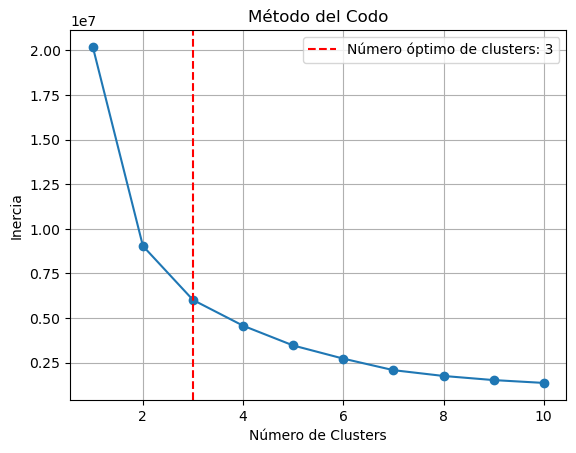

In [18]:
from sklearn.cluster import KMeans
from kneed import KneeLocator


inertia = []
for n_clusters in range(1, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(df_reduced)
    inertia.append(kmeans.inertia_)

# Graficar la variación de la inercia
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Número de Clusters')
plt.ylabel('Inercia')
plt.title('Método del Codo')

# Utilizar KneeLocator para encontrar el número óptimo de clusters automáticamente
knee_l = KneeLocator(range(1, kmeans.n_clusters + 1), inertia, curve="convex", direction="decreasing")
plt.axvline(x=knee_l.elbow, color='red', linestyle='--', label=f'Número óptimo de clusters: {knee_l.elbow}')

plt.grid(True)
plt.legend()
plt.show()


Determinar el número óptimo de clusters en K-Means es un desafío y no hay un enfoque único para hacerlo. Uno de los métodos utilizados para determinar el número de clusters es el Método del Codo (Elbow Method). Este método grafica la variación de la inercia (suma de cuadrados dentro del cluster) en función del número de clusters. El punto donde la tasa de disminución se desacelera (codo) a menudo se considera como el número óptimo de clusters.

Utilizando el KneeLocator para que matematicamente específicamente el punto exacto de clusters donde la tasa de disminución se desacelera. En este caso el número óptimo de clusters es 3.

In [19]:
#copia de seguridad 
df_reduced_1 = df_reduced.copy()
df_reduced_1.head()


,PCA_1,PCA_2,status_type_link,status_type_photo,status_type_status,status_type_video
0,48.141927,39.279885,0,0,0,1
1,-14.873807,-2.241151,0,1,0,0
2,3.371249,3.438150,0,0,0,1
3,-14.877890,-2.247779,0,1,0,0
4,-14.268106,-1.394616,0,1,0,0


In [31]:

df_reduced= df_reduced_1.copy()
df_reduced.head()

,PCA_1,PCA_2,status_type_link,status_type_photo,status_type_status,status_type_video
0,48.141927,39.279885,0,0,0,1
1,-14.873807,-2.241151,0,1,0,0
2,3.371249,3.438150,0,0,0,1
3,-14.877890,-2.247779,0,1,0,0
4,-14.268106,-1.394616,0,1,0,0


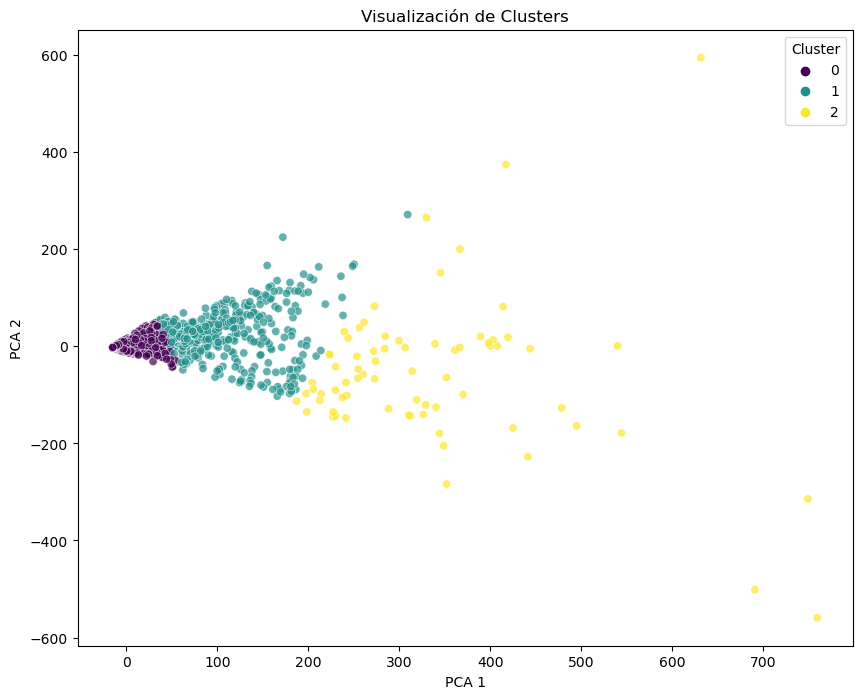

In [38]:
#número óptimo de clusters = 3
# Crear una nueva instancia de KMeans con 3 clusters
kmeans_final = KMeans(n_clusters=3, random_state=42)

# Ajustar el modelo a tus datos y predecir a qué cluster pertenece una nueva instancia
kmeans_final.fit(df_reduced)

# Obtener las etiquetas de cluster asignadas a cada instancia en tus datos
labels = kmeans_final.labels_

# Acceder a los centroides de los clusters si lo necesitas
centroids_final = kmeans_final.cluster_centers_
pred_km = kmeans_final.predict(df_reduced)

# Crear un gráfico de dispersión
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PCA_1', y='PCA_2', hue=labels, data=df_reduced, palette='viridis', alpha=0.7)
plt.title('Visualización de Clusters')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend(title='Cluster')
plt.show()

Se aplica el Análisis de Componentes Principales (PCA), para obtener los componentes principales que son combinaciones lineales de las variables originales en el conjunto de datos. Se observa la proximidad de los datos entre los diferentes clusters.

In [21]:
#Datos según cluster
df_reduced['Cluster'].value_counts()

0    6452
1     475
2      72
Name: Cluster, dtype: int64

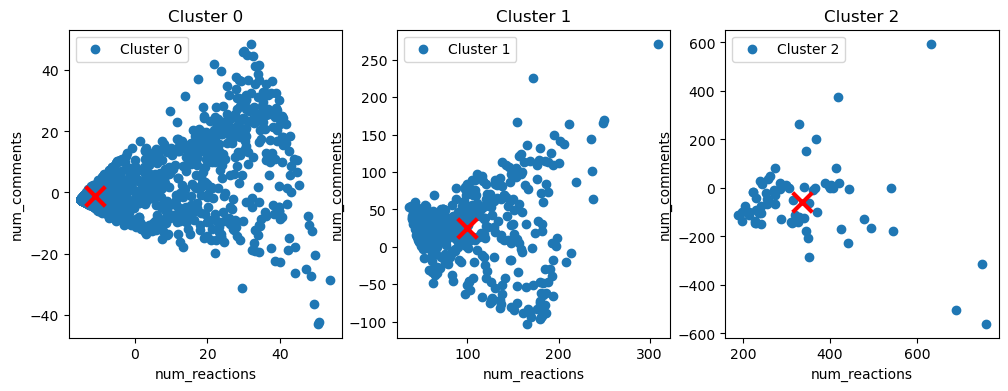

In [131]:

fig, axs = plt.subplots(1, 3, figsize=(12, 4))
for i, ax in enumerate(axs):
    group = df_reduced[labels == i]
    ax.scatter(group.iloc[:, 0], group.iloc[:, 1], label=f'Cluster {i}')
    ax.scatter(centroids[i, 0], centroids[i, 1], marker='x', s=200, linewidths=3, color='r')
    ax.set_xlabel('num_reactions')
    ax.set_ylabel('num_comments')
    ax.set_title(f'Cluster {i}')
    ax.legend()

Se visualiza los 3 clasters por separado y se detectan los centroides de cada cluster.

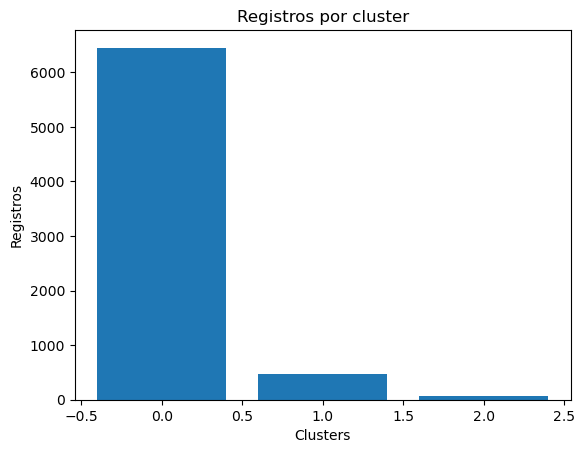

In [23]:
cluster_counts = df_reduced['Cluster'].value_counts()

# Crear el gráfico de barras
plt.bar(cluster_counts.index, cluster_counts)
plt.xlabel('Clusters')
plt.ylabel('Registros')
plt.title('Registros por cluster')

plt.show()

El gráfico detecta como la mayoria de los datos se encuentran en el cluster 0.

In [24]:
df['Cluster_Kmeans'] = labels #Crea nueva columna en el df original
df

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Cluster_Kmeans
0,video,529,512,262,432,92,3,1,1,0,1
1,photo,150,0,0,150,0,0,0,0,0,0
2,video,227,236,57,204,21,1,1,0,0,0
3,photo,111,0,0,111,0,0,0,0,0,0
4,photo,213,0,0,204,9,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
7045,photo,89,0,0,89,0,0,0,0,0,0
7046,photo,16,0,0,14,1,0,1,0,0,0
7047,photo,2,0,0,1,1,0,0,0,0,0
7048,photo,351,12,22,349,2,0,0,0,0,0


Se crea una columna en el df original para intentar averiguar de qué modo está agrupando los datos.

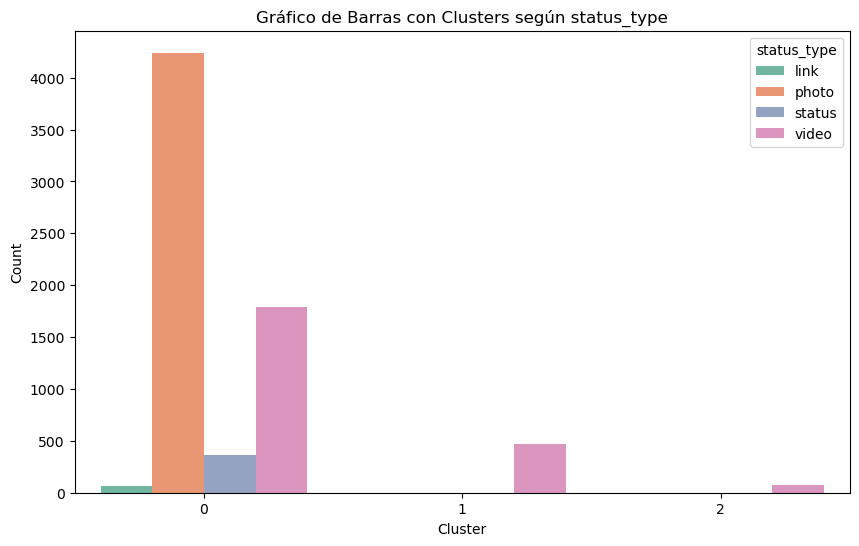

In [25]:
plt.figure(figsize=(10, 6))

# Graficar el gráfico de barras
sns.barplot(x='Cluster_Kmeans', y='Count', hue='status_type', data=df.groupby(['Cluster_Kmeans', 'status_type']).size().reset_index(name='Count'), palette='Set2')

plt.xlabel('Cluster')
plt.ylabel('Count')
plt.title('Gráfico de Barras con Clusters según status_type')
plt.show()

Es una gráfica interesante que muestra como la totalidad de links, fotos y status se encuentran en el cluster 0, además de ser un cluster muy homogéneo. Mientras que en los otros cluster se aprecian únicamente videos. Se puede comprender mejor la razón por la que en el cluser 0 tiene la mayoría de datos.

<Figure size 1000x600 with 0 Axes>

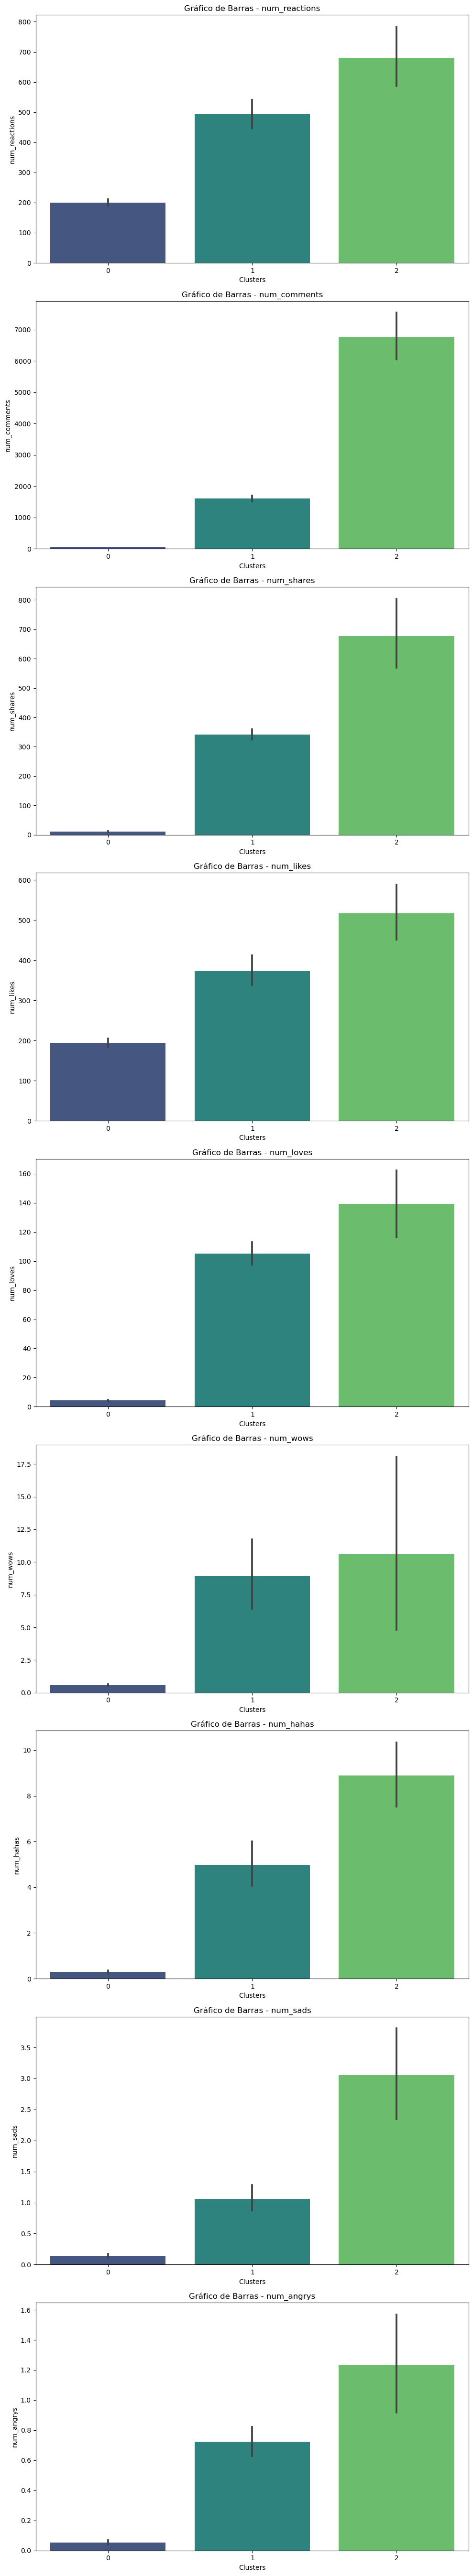

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
columns_of_interest = ['num_reactions', 'num_comments', 'num_shares', 'num_likes', 'num_loves','num_wows','num_hahas','num_sads','num_angrys']

# Crear subgráficos
fig, axes = plt.subplots(nrows=len(columns_of_interest), ncols=1, figsize=(10, len(columns_of_interest) * 6))

# Iterar sobre las columnas y crear un gráfico de barras para cada una
for i, column in enumerate(columns_of_interest):
    sns.barplot(x='Cluster_Kmeans', y=column, data=df, ax=axes[i], palette='viridis')
    axes[i].set_xlabel('Clusters')
    axes[i].set_ylabel(column)
    axes[i].set_title(f'Gráfico de Barras - {column}')

plt.tight_layout()
plt.show()

Se visualizan las variables numéricas del df con su distribución en los diversos clusters, a simple vista no se detecta ningún patrón, la mayoria estan repartidas por los clusters. La mayor dispersión se detecta en el cluster 2, por eso hay mayor cantidad de color. En este caso, las contribuciones del número de likes y el num de reacciones se muestran en el cluster 0, corroborando la alta correlación positiva entre ambas variables en relación al resto. El resto de variables se clasifican en el cluster 1 o 2. 

# Exercici 2
- Classifica els diferents registres utilitzant l'algorisme de clustering jeràrquic.

In [30]:
df_reduced.drop(['Cluster'], axis=1, inplace=True)

#Copia del dataframe para el nuevo metodo
df_agglo = df_reduced.copy()
df_agglo.head()

,PCA_1,PCA_2,status_type_link,status_type_photo,status_type_status,status_type_video
0,48.141927,39.279885,0,0,0,1
1,-14.873807,-2.241151,0,1,0,0
2,3.371249,3.438150,0,0,0,1
3,-14.877890,-2.247779,0,1,0,0
4,-14.268106,-1.394616,0,1,0,0


Se usa el df con las PCA realizadas, por lo que se elimina la columna de clusters del kmeans, para poder utilzar estos datos para el algoritmo de clustering jerárquico.

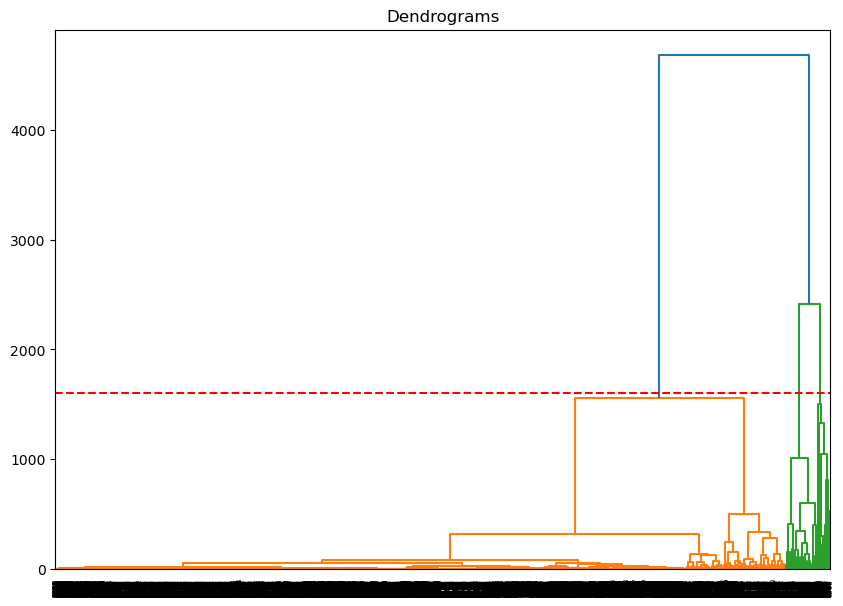

In [39]:
from scipy.cluster import hierarchy as shc

plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")
dend = shc.dendrogram(shc.linkage(df_agglo, method='ward'))
plt.axhline(y=1600, color='r', linestyle='--')

Un dendrograma es una representación visual de las relaciones de agrupacón entre los elementos en un conjunto de datos. Para determinar el número óptimo de clusters, se debe observar dónde cortar el dendrograma para maximizar la coherencia y minimizar la disimilitud dentro de los clusters resultantes. 
Si se hace una línea horizontal, perpendicular a la línea azul más larga quedan al descubierto 3 líneas por encima, dos verdes y una azul. Por lo que el resultado de clusters por los que empezar serían 3 según la observación.

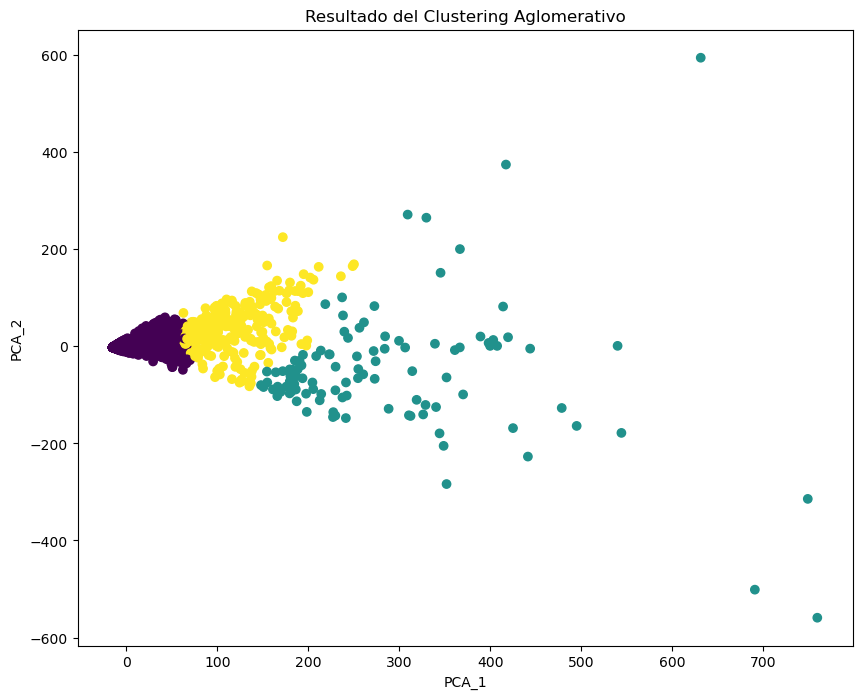

In [40]:
from sklearn.cluster import AgglomerativeClustering

# Crear el modelo de clustering aglomerativo
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')

# Ajustar el modelo y predecir los clusters
clusters = cluster.fit_predict(df_agglo)

# Visualizar los resultados en un gráfico de dispersión
plt.figure(figsize=(10, 8))
plt.scatter(df_agglo['PCA_1'], df_agglo['PCA_2'], c=clusters, cmap='viridis')
plt.title('Resultado del Clustering Aglomerativo')
plt.xlabel('PCA_1')
plt.ylabel('PCA_2')
plt.show()


Se observa que la distribución de clusters se parece mucho al Kmeans.

In [41]:
#Se añade al df Original
df['Cluster_aglo'] = clusters

In [42]:
df['Cluster_aglo'].value_counts()

0    6602
2     288
1     109
Name: Cluster_aglo, dtype: int64

In [43]:
df

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Cluster_Kmeans,Cluster_aglo
0,video,529,512,262,432,92,3,1,1,0,1,0
1,photo,150,0,0,150,0,0,0,0,0,0,0
2,video,227,236,57,204,21,1,1,0,0,0,0
3,photo,111,0,0,111,0,0,0,0,0,0,0
4,photo,213,0,0,204,9,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
7045,photo,89,0,0,89,0,0,0,0,0,0,0
7046,photo,16,0,0,14,1,0,1,0,0,0,0
7047,photo,2,0,0,1,1,0,0,0,0,0,0
7048,photo,351,12,22,349,2,0,0,0,0,0,0


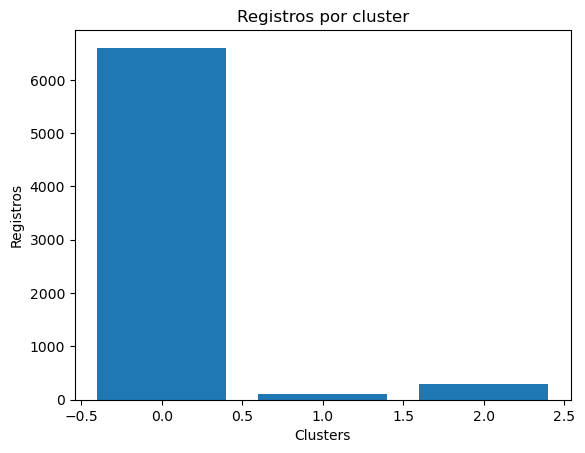

In [46]:
cluster_counts1 = df['Cluster_aglo'].value_counts()

# Crear el gráfico de barras
plt.bar(cluster_counts1.index, cluster_counts1)
plt.xlabel('Clusters')
plt.ylabel('Registros')
plt.title('Registros por cluster')

plt.show()

En esta distribución cluster 0 obteniendo la mayor aglomeración de datos. Distribución similar a kmeans.

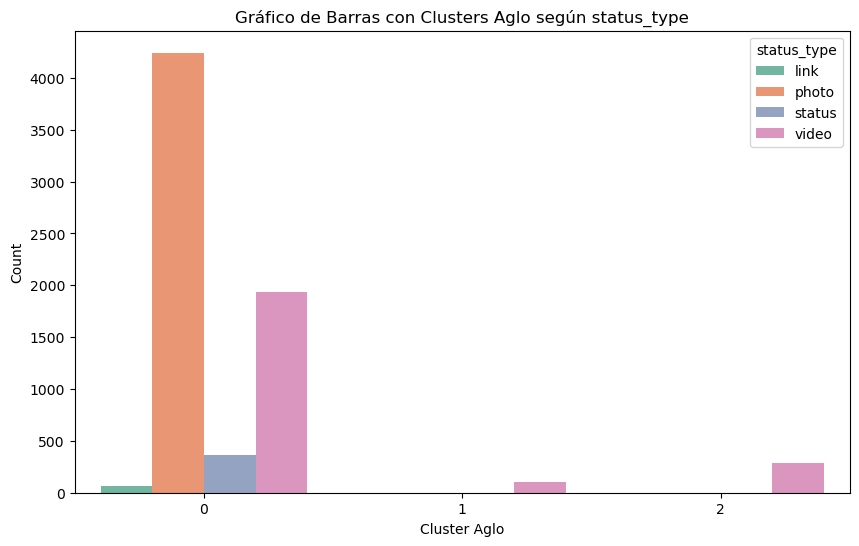

In [47]:
plt.figure(figsize=(10, 6))

# Graficar el gráfico de barras
sns.barplot(x='Cluster_aglo', y='Count', hue='status_type', data=df.groupby(['Cluster_aglo', 'status_type']).size().reset_index(name='Count'), palette='Set2')

plt.xlabel('Cluster Aglo')
plt.ylabel('Count')
plt.title('Gráfico de Barras con Clusters Aglo según status_type')
plt.show()

También una distribución muy similar a la obtenida en el kmeans. Siendo muy heterogéneo el cluster o, mientras los otros dos tienen mucha menor cantidad de datos, aportando únicamente videos. 

<Figure size 1000x600 with 0 Axes>

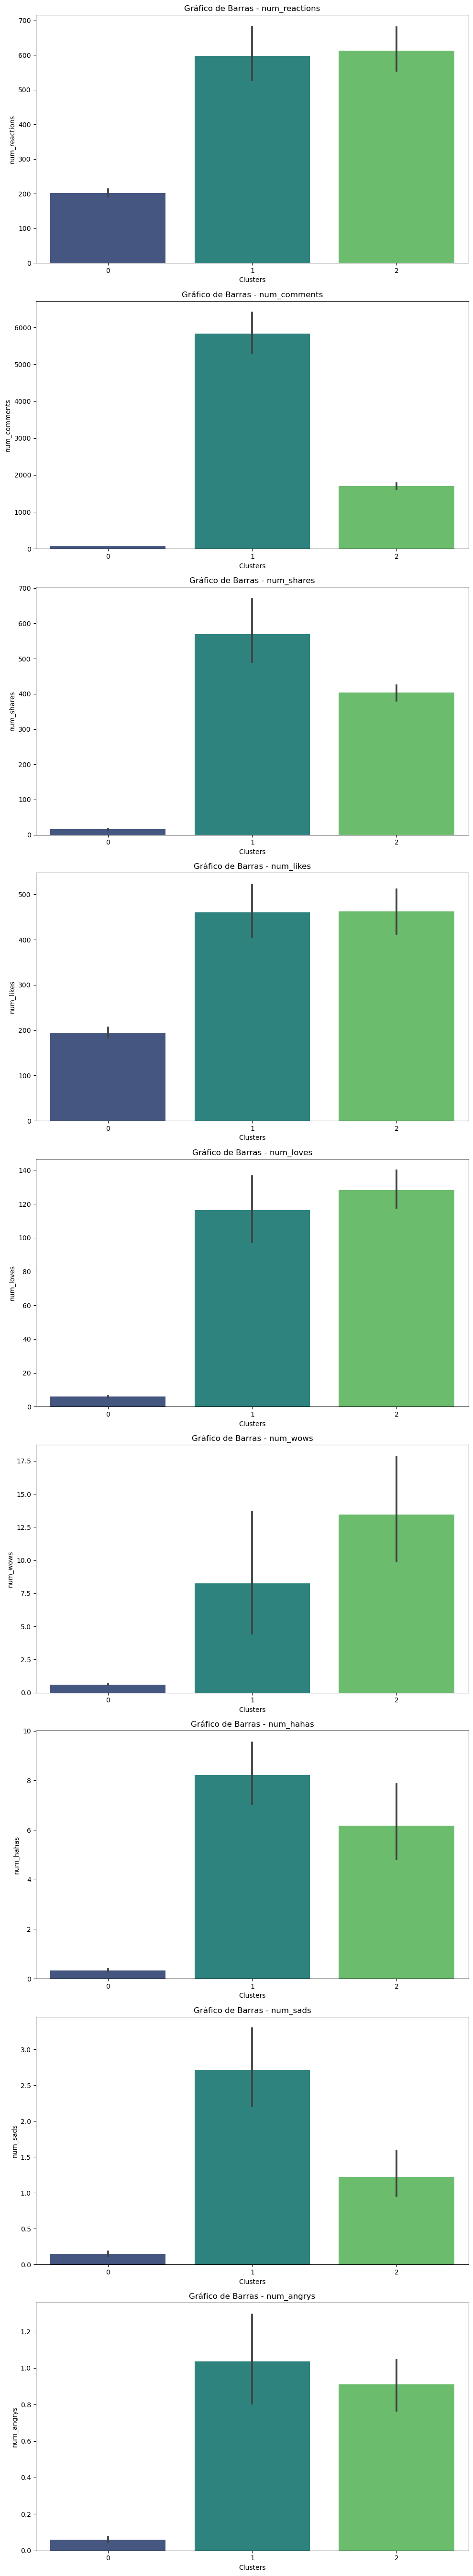

In [49]:
#Repitiendo la gráfica de kmeans

plt.figure(figsize=(10, 6))

# Crear subgráficos
fig, axes = plt.subplots(nrows=len(columns_of_interest), ncols=1, figsize=(10, len(columns_of_interest) * 6))

# Iterar sobre las columnas y crear un gráfico de barras para cada una
for i, column in enumerate(columns_of_interest):
    sns.barplot(x='Cluster_aglo', y=column, data=df, ax=axes[i], palette='viridis')
    axes[i].set_xlabel('Clusters')
    axes[i].set_ylabel(column)
    axes[i].set_title(f'Gráfico de Barras - {column}')

plt.tight_layout()
plt.show()

Siguen una distribución muy parecida al kmeans.
Como se menciona anteriormente, Las reacciones y los likes son los que más concentración en el cluster 0 tienen. Aunque se distribuyen a lo largo de los diferentes clusters. Teniendo el cluster 2 y el 3 mayor dispersión.

 # Exercici 3
- Calcula el rendiment del clustering mitjançant un paràmetre com pot ser silhouette.

El silhouette score nos vale para calcular si los clusters están bien formados. Va de valor -1 a 1 donde valores cercanos a 1 nos indicarían clusters bien cohesionados y separados entre sí. Valores cercanos a 0 nos indicarían que los clusters se solapan y el valor de cohesión y de separación son similares, lo cual no sería una situación deseada. Y valores cercanos a -1 nos indicarían una asignación incorrecta de los elementos a los clusters.

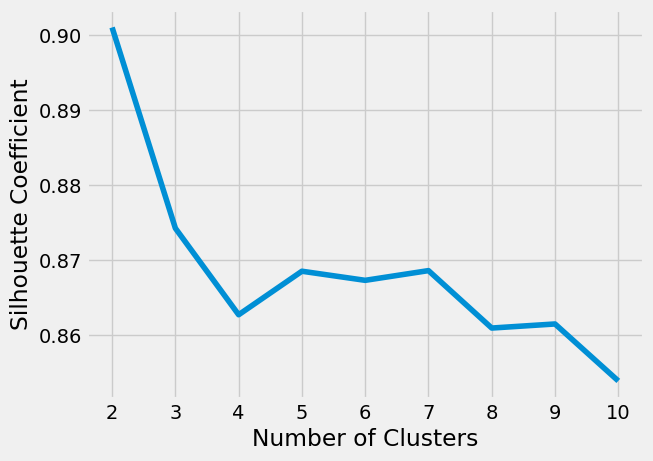

In [140]:
silhouette_coefficients = []

for n_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(df_reduced)
    silhouette_avg = silhouette_score(df_reduced, cluster_labels)
    silhouette_coefficients.append(silhouette_avg)

plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()


Se realiza un análisis del coeficiente de silueta para evaluar la calidad de la agrupación (clustering) de los datos en diferentes cantidades de clústeres. Este gráfico muestra que hubiera sido más óptimo 2 clusters para obtener una agrupación significativa y útil de los datos. Aunque el 3 clusters también muestra una muy buena agrupación. Como se observa en la gráfica, cuantos más clusters se hacen, menos óptimo. 

In [48]:
from sklearn.metrics import silhouette_score

km_sil = silhouette_score(df_reduced, pred_km).round(3)
agglo_sil = silhouette_score(df_agglo, clusters).round(3)

print("Rendimiento Kmeans con Silhouette:  {:.2f}%".format(km_sil))
print("Rendimiento Jerarquico con Silhouette:: {:.2f}%".format(agglo_sil))

Rendimiento Kmeans con Silhouette:  0.87%
Rendimiento Jerarquico con Silhouette:: 0.88%


El score de silhouette es una métrica utilizada para evaluar la calidad de una agrupación (cluster) en un conjunto de datos. Proporciona una medida de cuán bien están separados los clústeres, evaluando tanto la cohesión dentro de los clústeres como la separación entre los clústeres. El el score de silhouette, varía entre -1 y 1, y una puntuación más alta indica una mejor calidad a mejor rendimiento de la agrupación.

En este caso, el rendimiento del **modelo Jerarquico** es un poco mejor que el de Kmeans, aunque realmente los dos obtienen muy buenos resultados.